Задание
Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций).
Список результирующих наборов должен содержать как наборы, так и значение поддержки для каждого набора.
Параметрами программы являются набор, порог поддержки и способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).
Проведите эксперименты на наборе данных baskets.csv (сведения о покупках в супермаркете). В экспериментах варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%).
Выполните визуализацию результатов экспериментов в виде следующих диаграмм:

сравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки;
количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.
Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами:

формулировка задания;
гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами;
рисунки с результатами визуализации;
пояснения, раскрывающие смысл полученных результатов.

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np
import time 

In [2]:
df = pd.read_csv("baskets.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
transactions = df.values.tolist()
transactions = [[item for item in transaction if not pd.isnull(item)] for transaction in transactions]
transactions

[['креветки',
  'миндаль',
  'авокадо',
  'овощная смесь',
  'зеленый виноград',
  'цельнозерновая мука',
  'батат',
  'творог',
  'энергетический напиток',
  'томатный сок',
  'низкокалорийный йогурт',
  'зеленый чай',
  'мед',
  'салат',
  'минеральная вода',
  'лосось',
  'ягодный сок',
  'замороженный смузи',
  'шпинат',
  'оливковое масло'],
 ['гамбургер', 'фрикадельки', 'яйца'],
 ['чатни'],
 ['индейка', 'авокадо'],
 ['минеральная вода',
  'молоко',
  'энергетический батончик',
  'рис',
  'зеленый чай'],
 ['низкокалорийный йогурт'],
 ['цельнозерновые макароны', 'картофель-фри'],
 ['суп', 'низкокалорийный крем', 'лук-шалот'],
 ['замороженные овощи', 'макароны', 'зеленый чай'],
 ['картофель-фри'],
 ['яйца', 'корм для животных'],
 ['печенье'],
 ['индейка', 'гамбургер', 'минеральная вода', 'яйца', 'растительное масло'],
 ['макароны', 'шампанское', 'печенье'],
 ['минеральная вода', 'лосось'],
 ['минеральная вода'],
 ['креветки',
  'шоколад',
  'курица',
  'мед',
  'масло',
  'раститель

In [4]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_matrix = pd.DataFrame(te_ary, columns=te.columns_)
len(transactions_matrix.columns) == len(transactions_matrix.columns.unique())

True

In [5]:
transactions_matrix

,авокадо,аксессуары,баклажаны,батат,батончик без глютена,бекон,белое вино,белый сыр,блинчики,ветчина,...,чили,шампанское,шампунь,шоколад,шпинат,энергетический батончик,энергетический напиток,эскалоп,ягодный сок,яйца
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
def super_algorithm(transactions_matrix, support_value, sort_type = "support") -> tuple[pd.DataFrame, float]:
    start_time = time.time()
    result = apriori(df=transactions_matrix, min_support = support_value, use_colnames=True)
    execution = time.time() - start_time

    return result.sort_values(sort_type), execution

In [7]:
res1, execution_time = super_algorithm(transactions_matrix, support_value=0.01, sort_type='support')
res1

,support,itemsets
120,0.010132,"(замороженные овощи, низкокалорийный йогурт)"
235,0.010132,"(суп, шоколад)"
248,0.010132,"(яйца, говяжий фарш, минеральная вода)"
210,0.010265,"(хлопья, минеральная вода)"
96,0.010265,"(гамбургер, рис)"
...,...,...
69,0.163845,(шоколад)
20,0.170911,(картофель-фри)
73,0.179709,(яйца)
26,0.187975,(макароны)


In [8]:
res1, execution_time = super_algorithm(transactions_matrix, support_value=0.03, sort_type='support')
res1

,support,itemsets
41,0.030129,"(макароны, картофель-фри)"
24,0.030129,(сливочное масло)
28,0.030396,(томатный сок)
53,0.030796,"(молоко, яйца)"
40,0.031063,"(зеленый чай, минеральная вода)"
26,0.031862,(творог)
52,0.032129,"(молоко, шоколад)"
31,0.032396,(хот-дог)
54,0.033196,"(шоколад, яйца)"
0,0.033329,(авокадо)


In [9]:
res1, execution_time = super_algorithm(transactions_matrix, support_value=0.05, sort_type='support')
res1

,support,itemsets
19,0.050527,(суп)
27,0.050927,"(яйца, минеральная вода)"
17,0.051060,(растительное масло)
20,0.052393,(тертый сыр)
26,0.052660,"(шоколад, минеральная вода)"
9,0.059992,(курица)
25,0.061192,"(макароны, минеральная вода)"
6,0.062525,(индейка)
4,0.063325,(замороженный смузи)
14,0.065858,(оливковое масло)


In [10]:
res1, execution_time = super_algorithm(transactions_matrix, support_value=0.1, sort_type='support')
res1

,support,itemsets
4,0.129583,(молоко)
0,0.132116,(зеленый чай)
5,0.163845,(шоколад)
1,0.170911,(картофель-фри)
6,0.179709,(яйца)
2,0.187975,(макароны)
3,0.238368,(минеральная вода)


In [11]:
res1, execution_time = super_algorithm(transactions_matrix, support_value=0.15, sort_type='support')
res1

,support,itemsets
3,0.163845,(шоколад)
0,0.170911,(картофель-фри)
4,0.179709,(яйца)
1,0.187975,(макароны)
2,0.238368,(минеральная вода)


# Сравнение быстродействия на различных различных порогах вхождения

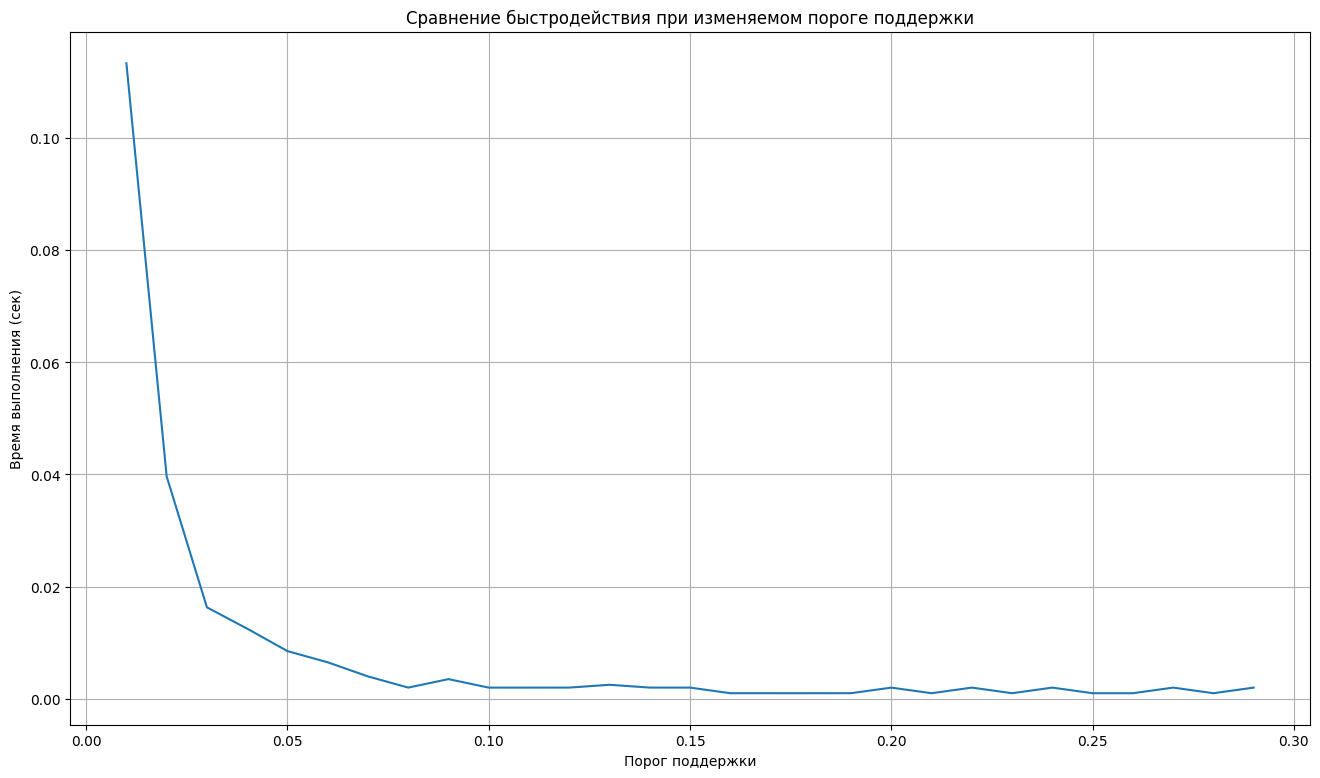

In [12]:
import matplotlib.pyplot as plt

def visualize_perfomance_by_min_sup(items, min_supp):
    times = []
    supp = []
    while min_supp < 0.3:
        _, time = super_algorithm(items, min_supp, sort_type='support')
        times.append(time)
        supp.append(min_supp)
        
        min_supp += 0.01
        min_supp = round(min_supp, 2)
        
    plt.figure(figsize=(16, 9))
    plt.plot(supp, times)
    plt.title('Сравнение быстродействия при изменяемом пороге поддержки')
    plt.xlabel('Порог поддержки')
    plt.ylabel('Время выполнения (сек)')
    plt.grid(True)
    plt.show()

visualize_perfomance_by_min_sup(transactions_matrix, 0.01)

C:\Users\Murph\AppData\Local\Temp\ipykernel_31308\1656802492.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_items_by_length[length].append(counts.get(length, 0))
C:\Users\Murph\AppData\Local\Temp\ipykernel_31308\1656802492.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_items_by_length[length].append(counts.get(length, 0))
C:\Users\Murph\AppData\Local\Temp\ipykernel_31308\1656802492.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

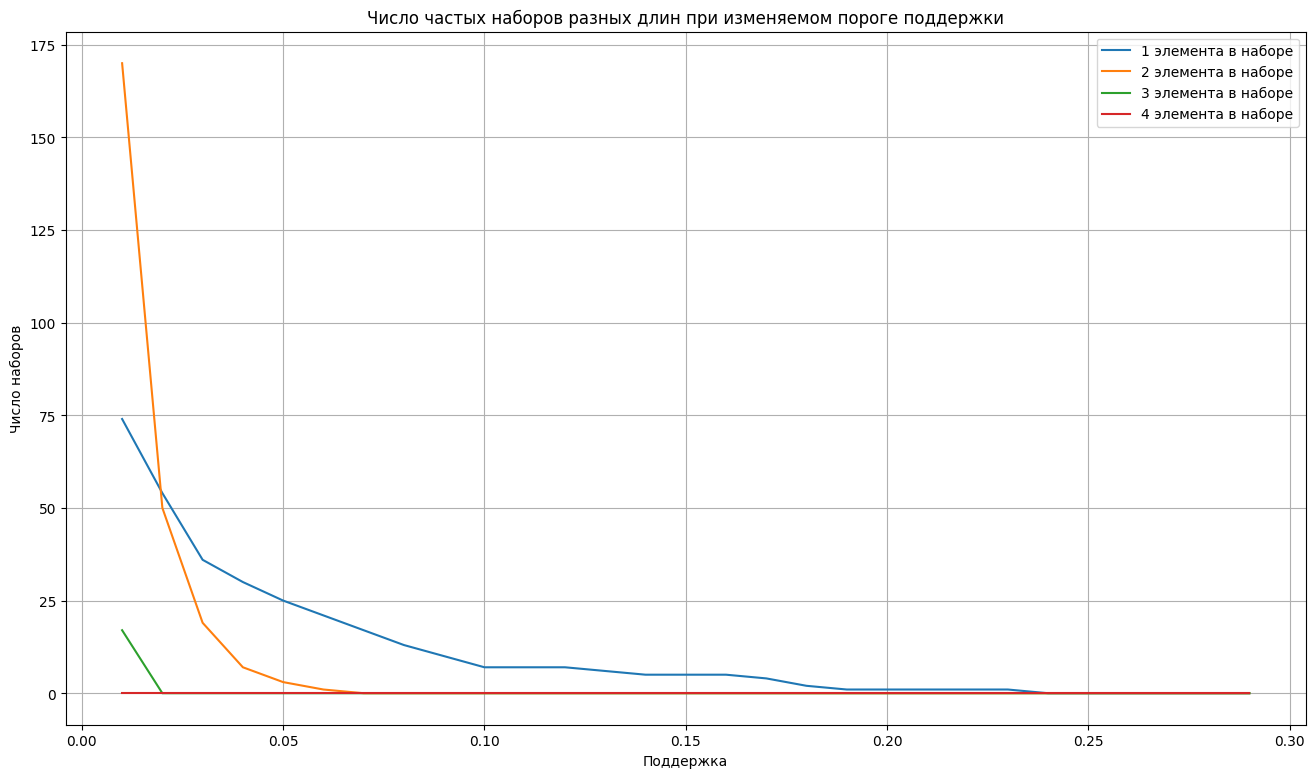

In [15]:
def visualize_number_of_items_by_min_sup(items, min_supp):
    # Создаем словарь для хранения результатов с максимальной длиной набора 5
    number_of_items_by_length = {i: [] for i in range(1, 5)}
    supports = []
    
    while min_supp < 0.3:
        frequent_itemsets, _ = super_algorithm(items, support_value=min_supp, sort_type = "support")
        
        # Подсчет количества наборов разной длины
        counts = frequent_itemsets['itemsets'].apply(len).value_counts().sort_index()
    
        # Сохраняем результаты
        for length in number_of_items_by_length.keys():
            number_of_items_by_length[length].append(counts.get(length, 0))
        supports.append(min_supp)   
        
        min_supp += 0.01
        min_supp = round(min_supp, 2)
        
    # Создаем диаграмму
    plt.figure(figsize=(16, 9))

    # Для каждой длины набора
    for length, counts in number_of_items_by_length.items():
        plt.plot(supports, counts, label=f'{length} элемента в наборе')

    plt.xlabel('Поддержка')
    plt.ylabel('Число наборов')
    plt.title('Число частых наборов разных длин при изменяемом пороге поддержки')
    plt.legend()
    plt.grid(True)
    plt.show()
    

visualize_number_of_items_by_min_sup(transactions_matrix, 0.01)

Из представленного графика видно, что при увеличении порога поддержки количество наборов, состоящих из нескольких элементов, резко сокращается. В то же время количество наборов, состоящих из одного элемента, уменьшается более плавно. Это говорит о том, что в датасете присутствует множество различных продуктов, которые комбинируются друг с другом в различных сочетаниях. В результате одни и те же сочетания встречаются в транзакциях реже, чем отдельные элементы.